In [2]:
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))

Saving final_truth_cleaned.csv to final_truth_cleaned.csv


In [3]:
import pandas as pd
data = pd.read_csv(file_name)

In [4]:
data.drop(columns=['Gender', 'Age_Group'], inplace=True)
data.dropna(subset=['Social_Status'], inplace=True)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Data

Cek Distribusi SES

<ipython-input-39-b7c20eaf21c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Social_Status'], palette='Reds')


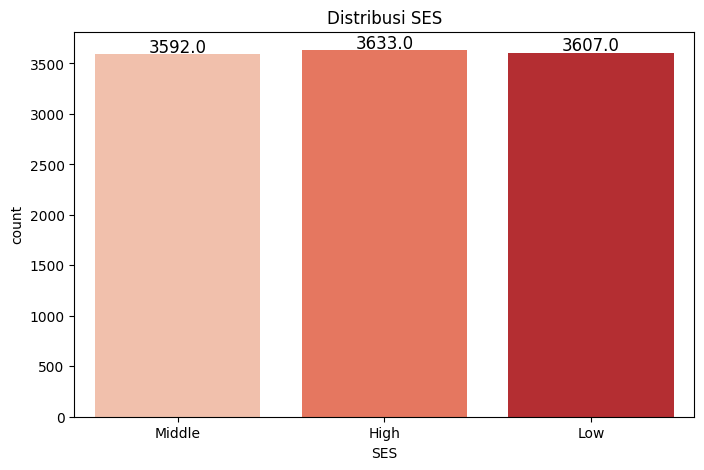

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=data['Social_Status'], palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi SES')
plt.xlabel('SES')
plt.show()

Cek Kategori Aplikasi yang Digunakan

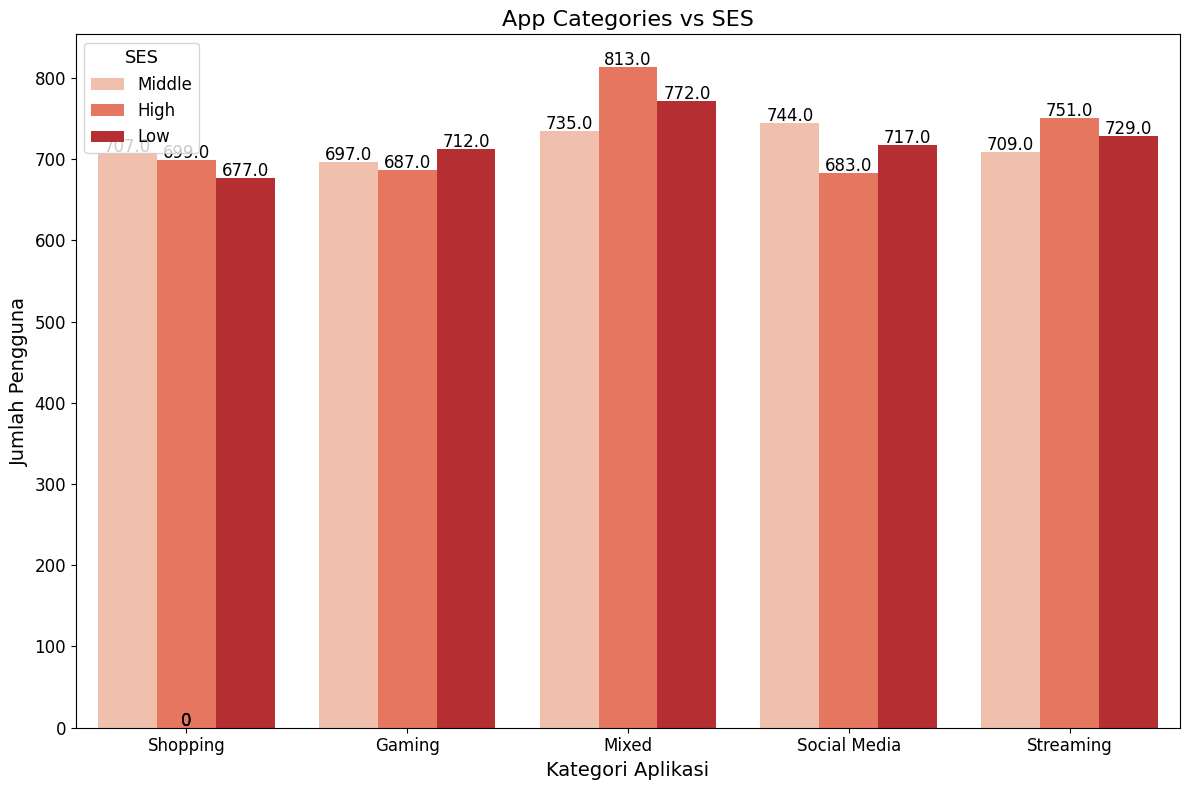

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=data, x='App_Categories_Used', hue='Social_Status', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('App Categories vs SES', fontsize=16)
plt.xlabel('Kategori Aplikasi', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='SES', title_fontsize=13, fontsize=12)
plt.tight_layout()
plt.show()

Cek Tipe Device yang Digunakan

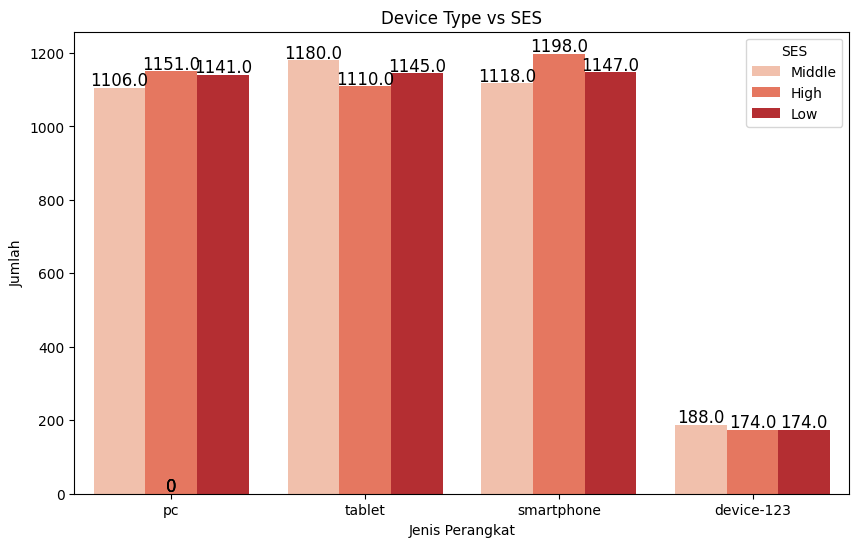

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='Device_Type', hue='Social_Status', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Device Type vs SES')
plt.xlabel('Jenis Perangkat')
plt.ylabel('Jumlah')
plt.legend(title='SES')
plt.show()

Cek Tipe Jaringan yang Digunakan

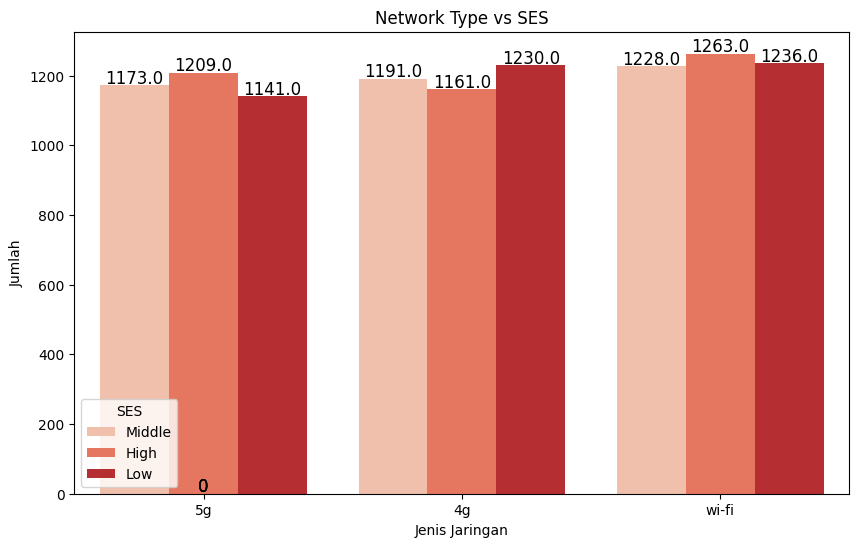

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='Network_Type', hue='Social_Status', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Network Type vs SES')
plt.xlabel('Jenis Jaringan')
plt.ylabel('Jumlah')
plt.legend(title='SES')
plt.show()

Cek Daerah Tempat Tinggal

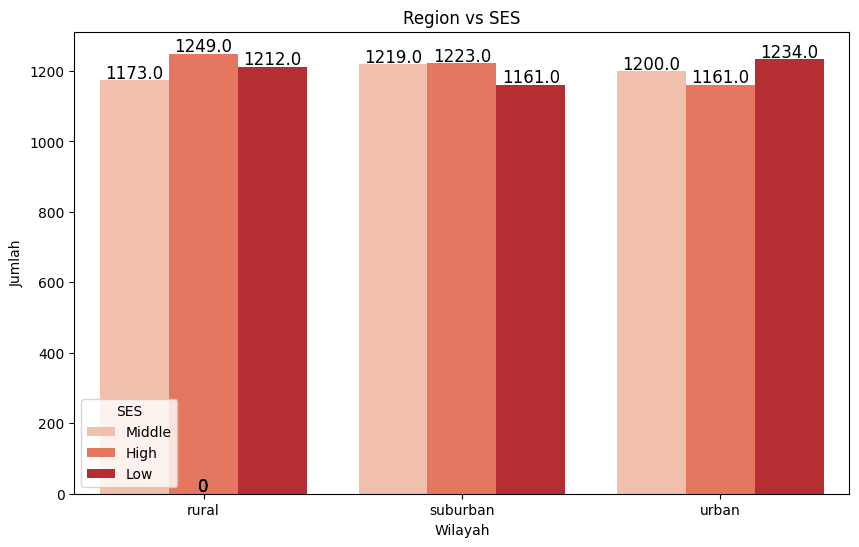

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='Region', hue='Social_Status', palette='Reds')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Region vs SES')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.legend(title='SES')
plt.show()

Cek Jumlah Orang per Kategori SES dengan Rentang Browsing Hour Weekdays

<ipython-input-47-fac3d9d2bafd>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_per_kategori_dan_rentang = data.groupby(['Social_Status', 'Browsing_Hours_Weekday_Range']).size().reset_index(name='Jumlah Orang')


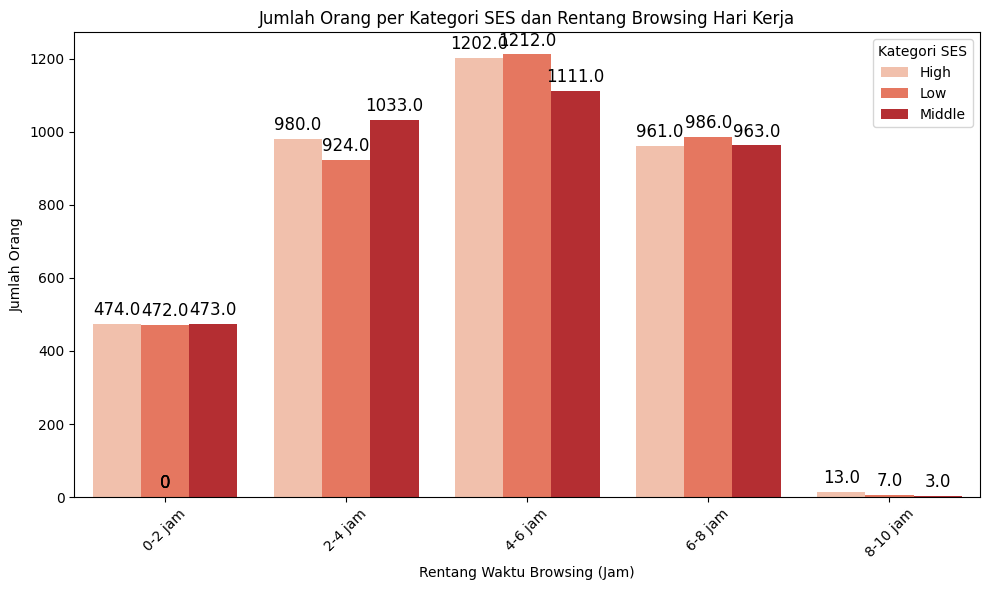

In [ ]:
data['Browsing_Hours_Weekday'] = pd.to_numeric(data['Browsing_Hours_Weekday'], errors='coerce')
data = data.dropna(subset=['Browsing_Hours_Weekday'])

# Range waktu browsing
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2 jam','2-4 jam', '4-6 jam', '6-8 jam', '8-10 jam']
data['Browsing_Hours_Weekday_Range'] = pd.cut(data['Browsing_Hours_Weekday'], bins=bins, labels=labels)

jumlah_per_kategori_dan_rentang = data.groupby(['Social_Status', 'Browsing_Hours_Weekday_Range']).size().reset_index(name='Jumlah Orang')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Browsing_Hours_Weekday_Range', y='Jumlah Orang', hue='Social_Status', palette='Reds', data=jumlah_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Jumlah Orang per Kategori SES dan Rentang Browsing Hari Kerja')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Jumlah Orang')
plt.legend(title='Kategori SES', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cek Jumlah Orang per Kategori SES dengan Rentang Browsing Hour Weekend

<ipython-input-48-0e43ef8725db>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_per_kategori_dan_rentang = data.groupby(['Social_Status', 'Browsing_Hours_Weekend_Range']).size().reset_index(name='Jumlah Orang')


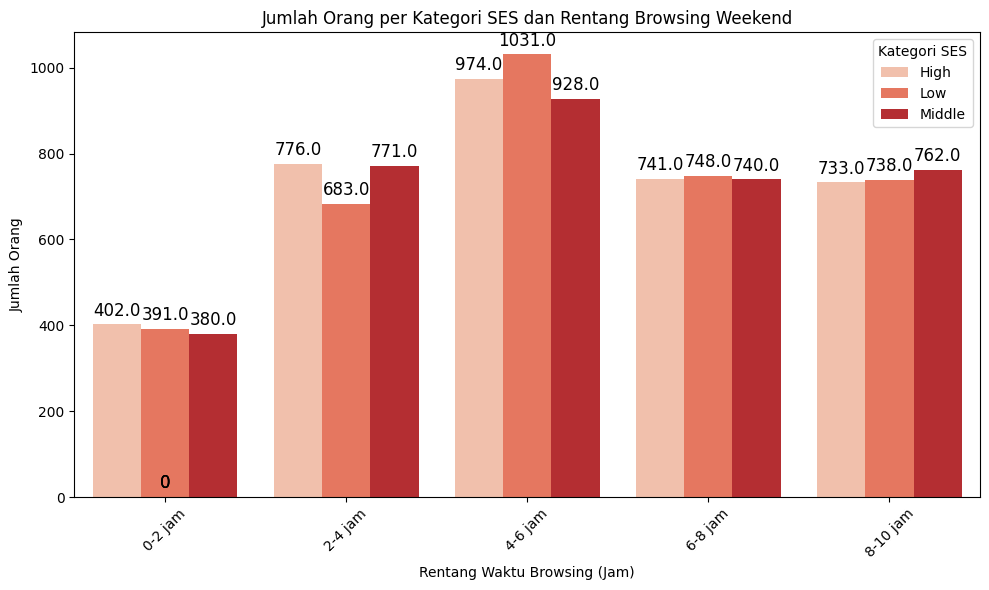

In [ ]:
data['Browsing_Hours_Weekend'] = pd.to_numeric(data['Browsing_Hours_Weekend'], errors='coerce')
data = data.dropna(subset=['Browsing_Hours_Weekend'])

# Range Browsing Weekend
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2 jam','2-4 jam', '4-6 jam', '6-8 jam', '8-10 jam']
data['Browsing_Hours_Weekend_Range'] = pd.cut(data['Browsing_Hours_Weekend'], bins=bins, labels=labels)

jumlah_per_kategori_dan_rentang = data.groupby(['Social_Status', 'Browsing_Hours_Weekend_Range']).size().reset_index(name='Jumlah Orang')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Browsing_Hours_Weekend_Range', y='Jumlah Orang', hue='Social_Status',palette='Reds', data=jumlah_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Jumlah Orang per Kategori SES dan Rentang Browsing Weekend')
plt.xlabel('Rentang Waktu Browsing (Jam)')
plt.ylabel('Jumlah Orang')
plt.legend(title='Kategori SES', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cek Jumlah Orang per Kategori SES dengan Rentang Data Usage

<ipython-input-50-9d16a2a3a928>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_per_kategori_dan_rentang = data.groupby(['Social_Status', 'Data_Usage_MB_Range']).size().reset_index(name='Jumlah Orang')


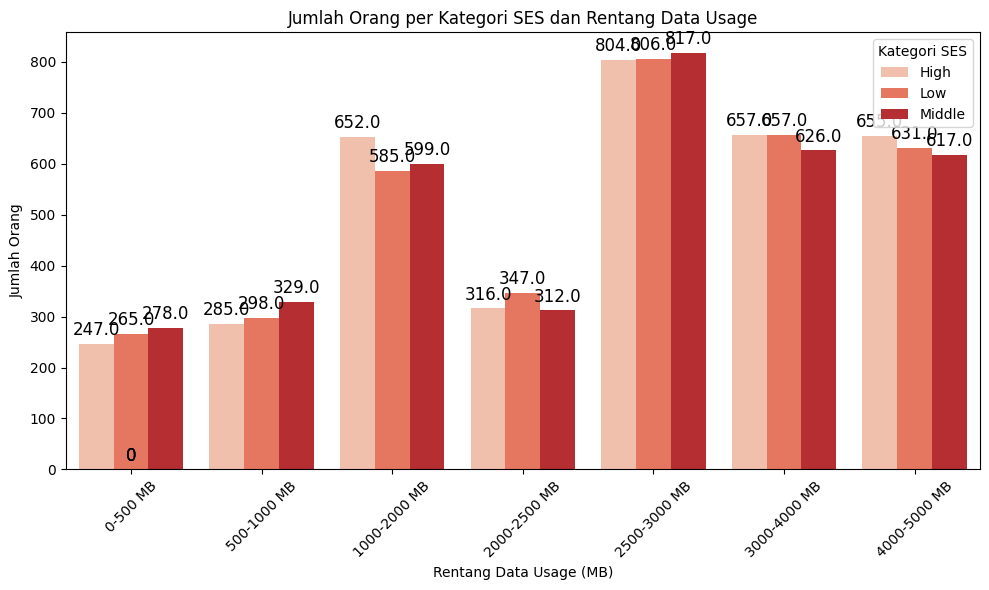

In [ ]:
data['Data_Usage_MB'] = pd.to_numeric(data['Data_Usage_MB'], errors='coerce')
data = data.dropna(subset=['Data_Usage_MB'])

# Range penggunaan Data Usage
bins = [0, 500, 1000, 2000, 2500, 3000, 4000, 5000]
labels = ['0-500 MB','500-1000 MB', '1000-2000 MB', '2000-2500 MB', '2500-3000 MB', '3000-4000 MB', '4000-5000 MB']
data['Data_Usage_MB_Range'] = pd.cut(data['Data_Usage_MB'], bins=bins, labels=labels)
jumlah_per_kategori_dan_rentang = data.groupby(['Social_Status', 'Data_Usage_MB_Range']).size().reset_index(name='Jumlah Orang')


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Data_Usage_MB_Range', y='Jumlah Orang', hue='Social_Status', palette='Reds', data=jumlah_per_kategori_dan_rentang)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Jumlah Orang per Kategori SES dan Rentang Data Usage')
plt.xlabel('Rentang Data Usage (MB)')
plt.ylabel('Jumlah Orang')
plt.legend(title='Kategori SES', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Cek Variabel Penting

<ipython-input-28-694e29d5bde1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Device_Type'] = le.fit_transform(X['Device_Type'])
<ipython-input-28-694e29d5bde1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Network_Type'] = le.fit_transform(X['Network_Type'])
<ipython-input-28-694e29d5bde1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

                  Feature  Importance
5  Browsing_Hours_Weekend    0.264532
4  Browsing_Hours_Weekday    0.261785
3           Data_Usage_MB    0.254811
2     App_Categories_Used    0.075568
0             Device_Type    0.054721
1            Network_Type    0.047506
6                  Region    0.041076


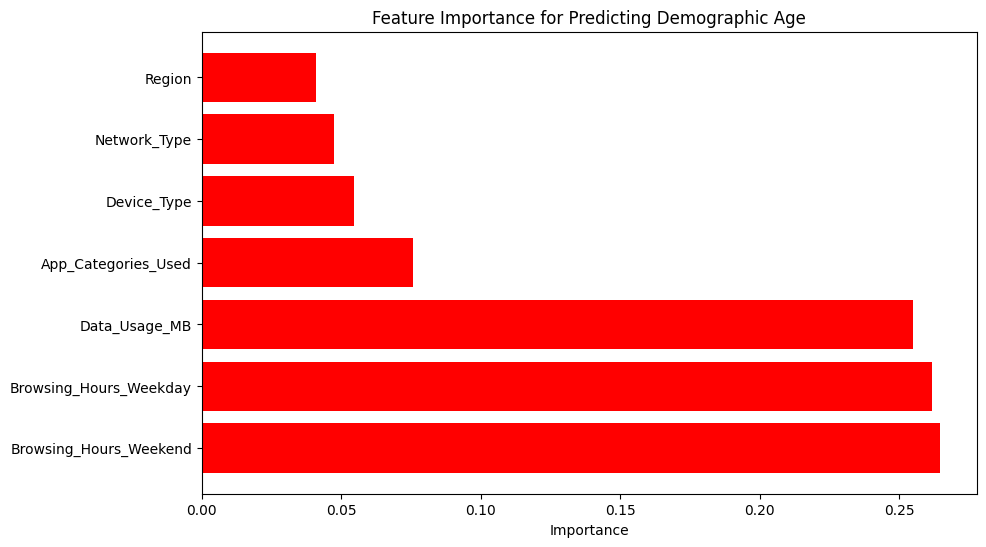

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Memisahkan fitur (X) dan target (y)
X = data[['Device_Type', 'Network_Type', 'App_Categories_Used', 'Data_Usage_MB',
          'Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Region']]
y = data['Social_Status']

# Encoding variabel kategorikal
le = LabelEncoder()

# Mengubah kolom kategorikal ke dalam format numerik
X['Device_Type'] = le.fit_transform(X['Device_Type'])
X['Network_Type'] = le.fit_transform(X['Network_Type'])
X['App_Categories_Used'] = le.fit_transform(X['App_Categories_Used'])
X['Browsing_Hours_Weekday'] = le.fit_transform(X['Browsing_Hours_Weekday'])
X['Browsing_Hours_Weekend'] = le.fit_transform(X['Browsing_Hours_Weekend'])
X['Region'] = le.fit_transform(X['Region'])

# Model Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importances (Variabel Penting)
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='Red')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Demographic Age')
plt.show()


# Model Heuristic

Berikut merupakan Model Heuristic menggunakan seluruh variabel yang tersedia pada data.

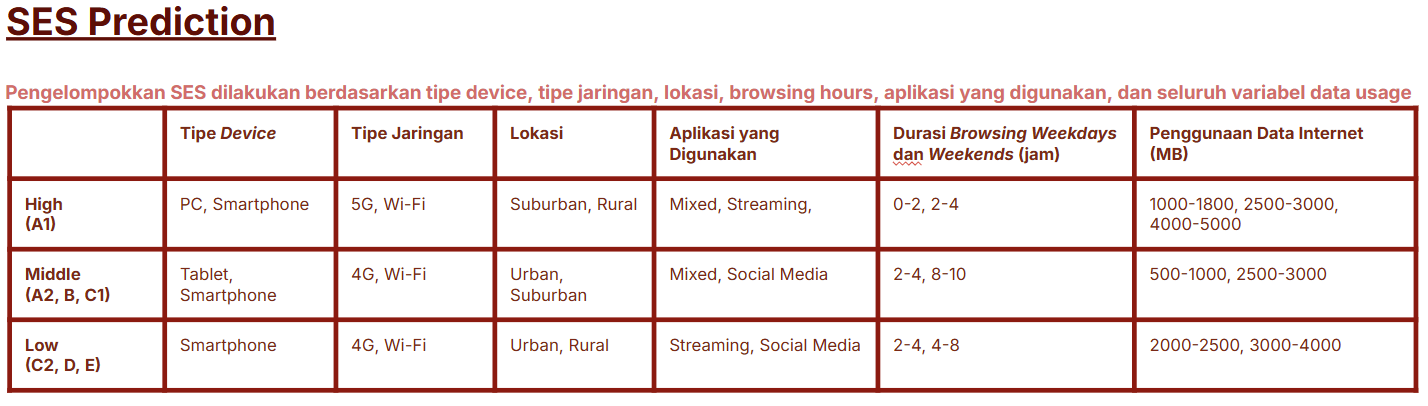

Heuristic Model Accuracy: 0.3472


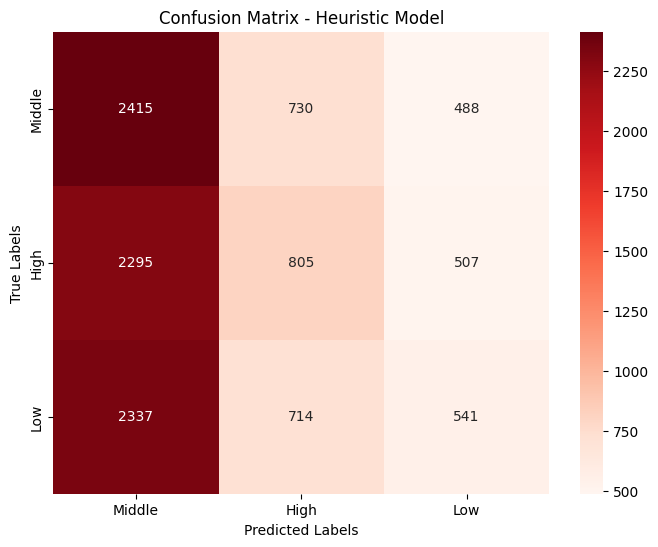

In [7]:
from sklearn.metrics import confusion_matrix

def categorize_ses(row):
    # High SES (Pengeluaran > Rp9.909.844)
    if row['Region'] in ['Suburban', 'Rural'] and row['Device_Type'] in ['PC', 'Smartphone'] and \
       (row['Network_Type'] in ['5G', 'Wi-Fi']) and row['App_Categories_Used'] in ['Mixed', 'Streaming'] and \
       (0 <= row['Browsing_Hours_Weekday'] <= 2) or \
       (2 <= row['Browsing_Hours_Weekend'] <= 4) or \
       ((1000 <= row['Data_Usage_MB'] <= 1800) or (2500 <= row['Data_Usage_MB'] <= 3000) or (4000 <= row['Data_Usage_MB'] <= 5000)):
        return 'High'

    # Middle SES (Pengeluaran Rp2.040.262 - Rp9.909.844)
    elif row['Region'] in ['Urban','Suburban'] and row['Device_Type'] in ['Tablet', 'Smartphone'] and \
         row['Network_Type'] in ['4G', 'Wi-Fi'] and row['App_Categories_Used'] in ['Mixed', 'Social Media'] and \
         (2 <= row['Browsing_Hours_Weekday'] <= 4) or \
         (8 <= row['Browsing_Hours_Weekend'] <= 10) or \
         ((500 <= row['Data_Usage_MB'] <= 1000) or (2500 <= row['Data_Usage_MB'] <= 3000)):
        return 'Middle'

    # Low SES (Pengeluaran < Rp2.040.262)
    elif row['Region'] in ['Urban', 'Rural'] and row['Device_Type'] == 'Smartphone' and \
         row['Network_Type'] in ['4G', 'Wi-Fi'] and row['App_Categories_Used'] in ['Streaming', 'Social Media'] and \
         (2 <= row['Browsing_Hours_Weekday'] <= 4) or \
         (4 <= row['Browsing_Hours_Weekend'] <= 8) or \
         ((2000 <= row['Data_Usage_MB'] <= 2500) or (3000 <= row['Data_Usage_MB'] <= 4000)):
        return 'Low'

    # Default: Jika tidak ada yang memenuhi aturan, pilih kategori terbanyak
    return data['Social_Status'].mode()[0]


# Model Heuristic
data['Predicted_Social_Status'] = data.apply(categorize_ses, axis=1)

# Akurasi Model
accuracy = (data['Predicted_Social_Status'] == data['Social_Status']).mean()
print(f'Heuristic Model Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(data['Social_Status'], data['Predicted_Social_Status'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=data['Social_Status'].unique(), yticklabels=data['Social_Status'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Heuristic Model')
plt.show()

Berikut merupakan Model Heuristic hanya menggunakan variabel penting pada data (Browsing Hours Weekend and Weekdays dan Data Usage).

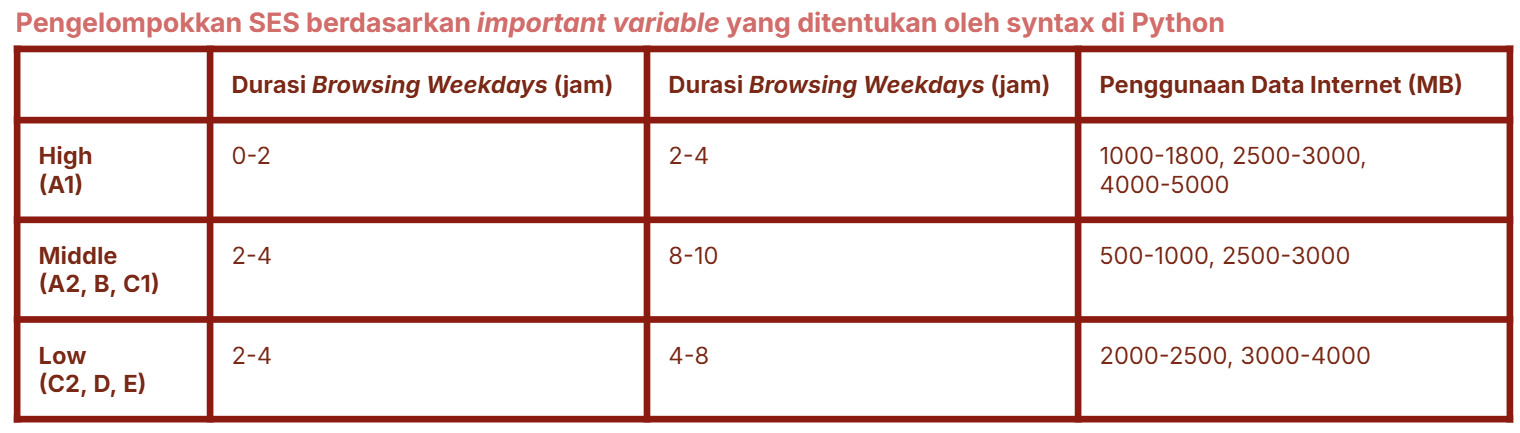

Heuristic Model Accuracy: 0.3451


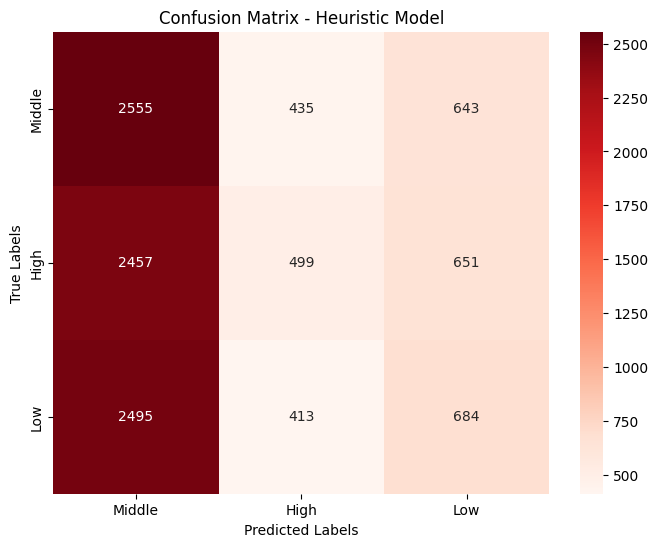

In [ ]:
def heuristic_model(row):
    # High SES (Pengeluaran > Rp9.909.844)
    if (0 <= row['Browsing_Hours_Weekday'] <= 2) or \
       (2 <= row['Browsing_Hours_Weekend'] <= 4) or \
       (1000 <= row['Data_Usage_MB'] <= 1800 or 2500 <= row['Data_Usage_MB'] <= 3000 or 4000 <= row['Data_Usage_MB'] <= 5000) :
       return 'High'

    # Middle SES (Pengeluaran Rp2.040.262 - Rp9.909.844)
    elif (2 <= row['Browsing_Hours_Weekday'] <= 4) or \
         (8 <= row['Browsing_Hours_Weekend'] <= 10) or \
         ((500 <= row['Data_Usage_MB'] <= 1000) or (2500 <= row['Data_Usage_MB'] <= 3000)):
        return 'Middle'

    # Low SES (Pengeluaran < Rp2.040.262)
    elif (2 <= row['Browsing_Hours_Weekday'] <= 4) or \
         (4 <= row['Browsing_Hours_Weekend'] <= 8) or \
         (2000 <= row['Data_Usage_MB'] <= 2500 or 3000 <= row['Data_Usage_MB'] <= 4000):
        return 'Low'

    # Default: Jika tidak ada yang memenuhi aturan, pilih kategori terbanyak
    else:
        return data['Social_Status'].mode()[0]

# Model Heuristic
data['Predicted_Social_Status'] = data.apply(heuristic_model, axis=1)

# Akurasi Model
accuracy = (data['Predicted_Social_Status'] == data['Social_Status']).mean()
print(f'Heuristic Model Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(data['Social_Status'], data['Predicted_Social_Status'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=data['Social_Status'].unique(), yticklabels=data['Social_Status'].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Heuristic Model')
plt.show()

# Model Machine Learning (Random Forest dan XGBoost)

<ipython-input-3-db37af75e2f7>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age_Group'].fillna(data['Age_Group'].mode()[0], inplace=True)
<ipython-input-3-db37af75e2f7>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Random Forest Accuracy: 0.34240886017535765
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.34      0.34       727
           1       0.34      0.33      0.34       722
           2       0.35      0.35      0.35       718

    accuracy                           0.34      2167
   macro avg       0.34      0.34      0.34      2167
weighted avg       0.34      0.34      0.34      2167



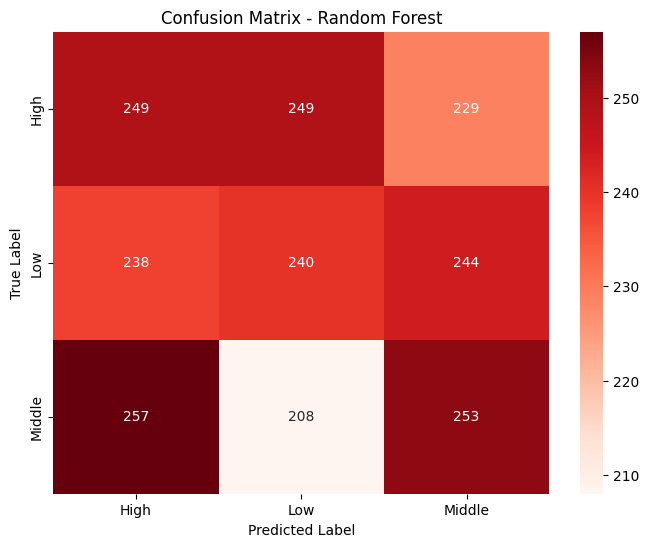

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.33271804337794186
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.35      0.35       727
           1       0.32      0.32      0.32       722
           2       0.33      0.33      0.33       718

    accuracy                           0.33      2167
   macro avg       0.33      0.33      0.33      2167
weighted avg       0.33      0.33      0.33      2167



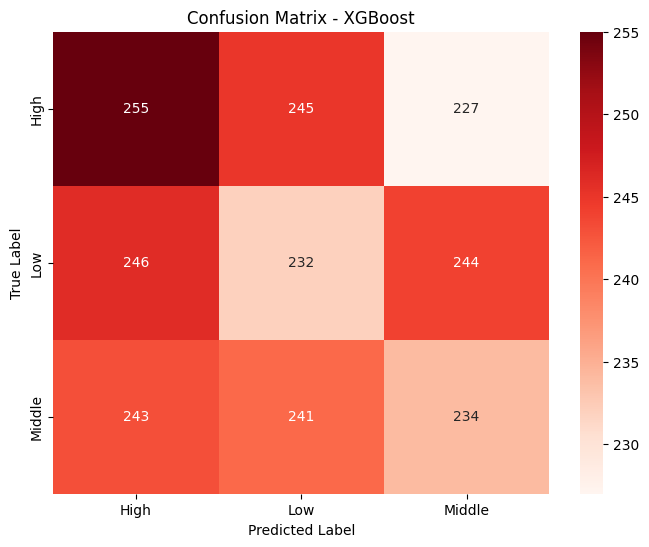

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data.drop(columns=['User_ID'], inplace=True)
data.dropna(subset=['Social_Status'], inplace=True)
data['Age_Group'].fillna(data['Age_Group'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Encoding variabel yang kategorikal
categorical_cols = ['App_Categories_Used', 'Device_Type', 'Network_Type', 'Region', 'Age_Group', 'Gender', 'Social_Status']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Social_Status'])
y = data['Social_Status']

# Memisahkan data untuk training dan data untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)

# Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoders['Social_Status'].classes_, yticklabels=label_encoders['Social_Status'].classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model XGBoost
xgb_model = XGBClassifier(n_estimators=50, max_depth=6, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", report_xgb)

# Confusion Matrix untuk XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoders['Social_Status'].classes_, yticklabels=label_encoders['Social_Status'].classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
